# Importancia de Entender y Gestionar el Error Numérico

El error numérico, inherente en cualquier cálculo aproximado, es relevante para la precisión y fiabilidad de las soluciones numéricas.

Su gestión y comprensión son esenciales para garantizar resultados confiables en aplicaciones del mundo real.

## 1. Validación y Confiabilidad

**Definición:** 

 - Validar un modelo o solución significa confirmar su concordancia con la realidad o un estándar conocido. 
 - La confiabilidad se refiere a la consistencia y repetibilidad de los resultados.

**Importancia:**
- Permite evaluar la precisión de modelos y resultados.
- Previene conclusiones erróneas basadas en cálculos imprecisos.

**Ejemplo:**

In [2]:
import numpy as np

# Este código implementa el método de Monte Carlo para estimar 
# el valor de π (pi). 
# - Genera n puntos aleatorios en un cuadrado de 2x2 centrado en el origen
# - Cuenta cuántos de estos puntos caen dentro de un círculo de radio 1.
# - Usa la relación entre el área del círculo y el cuadrado para estimar π.

# A_1 = pi * (d/2)² = d²/4  
# A_2 =  d²
# pi  = 4 * (A_1/A_2) 

def monte_carlo_pi(n):
    points_inside_circle = 0
    total_points = n  # n es el número de puntos aleatorios a generar.
    
    # Genera n puntos aleatorios en un cuadrado de 2x2 centrado en el origen
    for _ in range(n):
        x, y = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
        
        # Cuenta cuántos de estos puntos caen dentro de un círculo de radio 1.
        if x**2 + y**2 <= 1:
            points_inside_circle += 1
    # Usa la relación entre el área del círculo y el cuadrado para estimar π.
    return 4 * points_inside_circle / total_points

# Calcula estimaciones de π para diferentes números de puntos (10^2 a 10^6).
estimations = [monte_carlo_pi(10**i) for i in range(2, 7)]

#Calcula el error absoluto para cada estimación comparándola con el valor real de π.
errors = [abs(est - np.pi) for est in estimations]

for i, (est, err) in enumerate(zip(estimations, errors), 2):
    print(f"N = 10^{i}: π ≈ {est:.6f}, Error = {err:.6f}")

N = 10^2: π ≈ 3.080000, Error = 0.061593
N = 10^3: π ≈ 3.144000, Error = 0.002407
N = 10^4: π ≈ 3.139200, Error = 0.002393
N = 10^5: π ≈ 3.133600, Error = 0.007993
N = 10^6: π ≈ 3.141492, Error = 0.000101


## 2. Optimización de Recursos

**Definición:** Utilización eficiente de tiempo, memoria y capacidad de cálculo.

**Importancia:**
- Determina cuándo una solución es "suficientemente buena".
- Evita cálculos innecesarios que consumen recursos sin mejorar significativamente la precisión.

**Ejemplo:** Comparación de métodos de integración numérica

In [6]:
import numpy as np
from scipy import integrate

def f(x):
    return np.sin(x)

def trapezoidal_rule(f, a, b, n):
    x = np.linspace(a, b, n+1)
    y = f(x)
    return (b-a)/n * (y[0]/2 + np.sum(y[1:-1]) + y[-1]/2)

# Comparar precisión y tiempo de ejecución
a, b = 0, np.pi
exact = 2.0

for n in [10, 100, 1000, 10000]:
    trap = trapezoidal_rule(f, a, b, n)
    quad, _ = integrate.quad(f, a, b)
    
    print(f"N = {n}:")
    print(f"  Trapezoidal: {trap:.8f}, Error: {abs(trap-exact):.8f}")
    print(f"  Quad: {quad:.8f}, Error: {abs(quad-exact):.8f}")

N = 10:
  Trapezoidal: 1.98352354, Error: 0.01647646
  Quad: 2.00000000, Error: 0.00000000
N = 100:
  Trapezoidal: 1.99983550, Error: 0.00016450
  Quad: 2.00000000, Error: 0.00000000
N = 1000:
  Trapezoidal: 1.99999836, Error: 0.00000164
  Quad: 2.00000000, Error: 0.00000000
N = 10000:
  Trapezoidal: 1.99999998, Error: 0.00000002
  Quad: 2.00000000, Error: 0.00000000


## 3. Toma de Decisiones Informadas

**Definición:** Uso de resultados numéricos para tomar decisiones en diversos campos.

**Importancia:**
- Ayuda a interpretar correctamente los resultados.
- Permite evaluar la significancia de las diferencias entre opciones.

**Ejemplo:** Decisión basada en simulación Monte Carlo


In [7]:
import numpy as np

def investment_return(initial, years, mean_return, volatility):
    annual_returns = np.random.normal(mean_return, volatility, years)
    return initial * np.prod(1 + annual_returns)

np.random.seed(42)
simulations = 10000
initial_investment = 10000
years = 10

stock_returns = [investment_return(initial_investment, years, 0.08, 0.2) for _ in range(simulations)]
bond_returns = [investment_return(initial_investment, years, 0.04, 0.05) for _ in range(simulations)]

print(f"Stocks - Mean: ${np.mean(stock_returns):.2f}, Std Dev: ${np.std(stock_returns):.2f}")
print(f"Bonds - Mean: ${np.mean(bond_returns):.2f}, Std Dev: ${np.std(bond_returns):.2f}")
print(f"Probability stocks outperform: {np.mean(np.array(stock_returns) > np.array(bond_returns)):.2%}")

Stocks - Mean: $21780.62, Std Dev: $14155.13
Bonds - Mean: $14809.52, Std Dev: $2261.69
Probability stocks outperform: 63.52%


## 4. Educación y Comunicación

**Definición:** Capacidad de comunicar resultados, incertidumbres y significados a diversas audiencias.

**Importancia:**
- Permite comunicar con precisión los límites y confiabilidades de los resultados.
- Evita malentendidos y establece expectativas claras.

**Ejemplo:** Visualización de incertidumbre

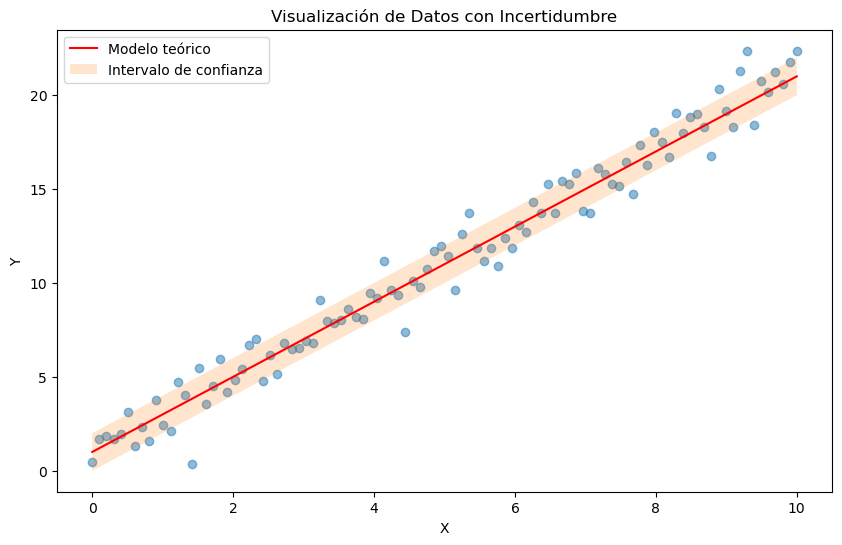

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(0, 1, 100)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.plot(x, 2*x + 1, 'r', label='Modelo teórico')
plt.fill_between(x, 2*x, 2*x + 2, alpha=0.2, label='Intervalo de confianza')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualización de Datos con Incertidumbre')
plt.legend()
plt.show()

## Conclusión

La gestión y comprensión adecuadas del error numérico:
- Aseguran la precisión y validez de los resultados numéricos.
- Optimizan el uso de recursos computacionales.
- Mejoran la toma de decisiones basada en datos.
- Facilitan una comunicación clara y precisa de los resultados.

Para cualquier profesional que trabaje con cálculos y modelos numéricos, es esencial tener una comprensión sólida del error numérico y su gestión.